# BBC021: Human MCF7 cells – compound-profiling experiment

In [3]:
# %load ../common_.py
import sys
sys.path.append("../..")
from common import *

In [4]:
from aicsimageio.readers.tiff_glob_reader import TiffGlobReader
import re
import cellpose
from cellpose import models
from skimage.measure import regionprops

In [5]:
data_dir = Path("/user/gent/420/vsc42015/vsc_data_vo/datasets/BBBC021")

In [3]:
%env CUDA_VISIBLE_DEVICES=4

env: CUDA_VISIBLE_DEVICES=4


In [5]:
data_dir = Path("/home/maximl/scratch/data/vsc/datasets/BBBC021")

In [6]:
def map_to_index(f):
    idx = re.match("^.*_w([0-9]).*$", f).group(1)
    m = {"1": 0, "2": 1, "4": 2}
    return pandas.Series(
        dict(S=0, T=0, C=m[idx], Z=0)
    )

im = TiffGlobReader(
    glob_in=sorted([str(p) for p in data_dir.glob("debug/Week1_150607_B02_s1_w*.tif")]),
    indexer=map_to_index,
    channel_names=["DAPI", "Tubulin", "Actin"]
)

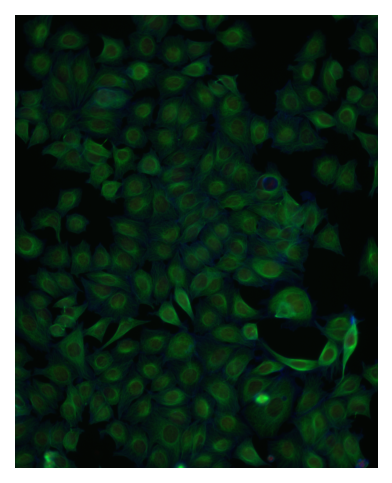

In [7]:
pixels = im.get_image_data("XYC")

fig, ax = plt.subplots(dpi=150)
ax.imshow(pixels / pixels.reshape(1, -1).max(axis=1))
ax.set_axis_off()

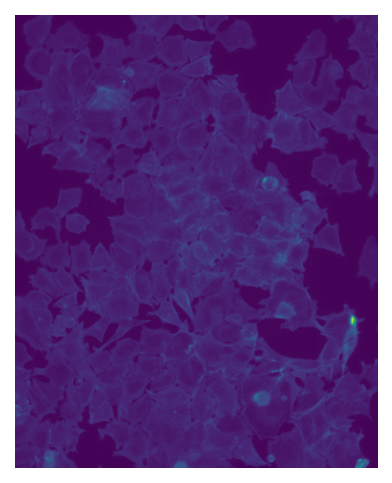

In [14]:
pixels = im.get_image_data("XYC")

fig, ax = plt.subplots(dpi=150)
ax.imshow(pixels[..., 2])
ax.set_axis_off()

In [35]:
import tifffile

In [36]:
tifffile.imwrite(data_dir / "debug/test1_1.tiff", im.get_image_data("CYX")[0, :400, :400].astype("uint16"))
tifffile.imwrite(data_dir / "debug/test1_2.tiff", im.get_image_data("CYX")[1, :400, :400].astype("uint16"))
tifffile.imwrite(data_dir / "debug/test2_1.tiff", im.get_image_data("CYX")[0, 400:800, 400:800].astype("uint16"))
tifffile.imwrite(data_dir / "debug/test2_2.tiff", im.get_image_data("CYX")[1, 400:800, 400:800].astype("uint16"))

In [8]:
model = models.Cellpose(gpu=True, model_type='cyto2')

2022-05-30 09:14:12,338 [INFO] ** TORCH CUDA version installed and working. **
2022-05-30 09:14:12,342 [INFO] >>>> using GPU


In [23]:
pixels = im.get_image_data("CXY")

In [10]:
%%timeit -r 3 -n 5
masks, flows, styles, diams = model.eval([pixels], diameter=None, channels=[2, 1], mask_threshold=0.2)

2022-05-30 09:15:42,713 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-05-30 09:15:45,212 [WARNING] WARNING: not interp
2022-05-30 09:15:49,323 [INFO] estimated cell diameter(s) in 6.61 sec
2022-05-30 09:15:49,324 [INFO] >>> diameter(s) = 
2022-05-30 09:15:49,327 [INFO] [72.67, ]
2022-05-30 09:15:49,328 [INFO] ~~~ FINDING MASKS ~~~
2022-05-30 09:15:51,800 [INFO] >>>> TOTAL TIME 9.09 sec
2022-05-30 09:15:51,802 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-05-30 09:15:53,782 [WARNING] WARNING: not interp
2022-05-30 09:15:58,054 [INFO] estimated cell diameter(s) in 6.25 sec
2022-05-30 09:15:58,058 [INFO] >>> diameter(s) = 
2022-05-30 09:15:58,059 [INFO] [72.67, ]
2022-05-30 09:15:58,060 [INFO] ~~~ FINDING MASKS ~~~
2022-05-30 09:16:00,493 [INFO] >>>> TOTAL TIME 8.69 sec
2022-05-30 09:16:00,495 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-05-30 09:16:02,787 [WARNING] WARNING: not interp
2022-05-30 09:16:07,308 [INFO] estimated cell diameter(s) in 6.81 sec
2022-05-30 09:16:07,312 [IN

In [24]:
%%timeit -r 3 -n 3
masks, flows, styles, diams = model.eval([pixels], diameter=None, resample=False, channels=[2, 1], mask_threshold=0.2)

2022-05-30 09:39:32,488 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-05-30 09:39:34,822 [WARNING] WARNING: not interp
2022-05-30 09:39:39,299 [INFO] estimated cell diameter(s) in 6.81 sec
2022-05-30 09:39:39,303 [INFO] >>> diameter(s) = 
2022-05-30 09:39:39,304 [INFO] [72.67, ]
2022-05-30 09:39:39,305 [INFO] ~~~ FINDING MASKS ~~~
2022-05-30 09:39:41,592 [INFO] >>>> TOTAL TIME 9.10 sec
2022-05-30 09:39:41,594 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-05-30 09:39:43,248 [WARNING] WARNING: not interp
2022-05-30 09:39:47,699 [INFO] estimated cell diameter(s) in 6.11 sec
2022-05-30 09:39:47,703 [INFO] >>> diameter(s) = 
2022-05-30 09:39:47,705 [INFO] [72.67, ]
2022-05-30 09:39:47,705 [INFO] ~~~ FINDING MASKS ~~~
2022-05-30 09:39:49,637 [INFO] >>>> TOTAL TIME 8.04 sec
2022-05-30 09:39:49,639 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-05-30 09:39:51,416 [WARNING] WARNING: not interp
2022-05-30 09:39:55,765 [INFO] estimated cell diameter(s) in 6.13 sec
2022-05-30 09:39:55,768 [IN

In [26]:
masks, flows, styles, diams = model.eval([pixels], diameter=None, resample=False, channels=[2, 1], mask_threshold=0.2)

2022-05-30 09:41:28,517 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-05-30 09:41:30,526 [WARNING] WARNING: not interp
2022-05-30 09:41:35,739 [INFO] estimated cell diameter(s) in 7.22 sec
2022-05-30 09:41:35,742 [INFO] >>> diameter(s) = 
2022-05-30 09:41:35,743 [INFO] [72.67, ]
2022-05-30 09:41:35,743 [INFO] ~~~ FINDING MASKS ~~~
2022-05-30 09:41:38,141 [INFO] >>>> TOTAL TIME 9.62 sec


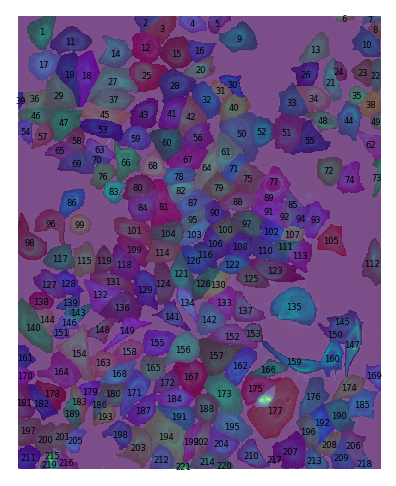

In [27]:
fig, ax = plt.subplots(1, 1, dpi=150)

ax.imshow((pixels / pixels.reshape(1, -1).max(axis=1))[1])
ax.set_axis_off()

ax.imshow(cellpose.plot.mask_rgb(masks[0]), alpha=0.3)
for prop in regionprops(label_image=masks[0]):
    ax.text(prop.centroid[1], prop.centroid[0], prop.label, fontsize=4, ha="center", va="center")

In [16]:
masks2, flows2, styles2, diams2 = model.eval([pixels], diameter=None, channels=[2, 0], mask_threshold=0.2)

2022-05-23 11:42:55,089 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-05-23 11:42:56,961 [WARNING] WARNING: not interp
2022-05-23 11:43:00,980 [INFO] estimated cell diameter(s) in 5.89 sec
2022-05-23 11:43:00,981 [INFO] >>> diameter(s) = 
2022-05-23 11:43:00,982 [INFO] [73.19, ]
2022-05-23 11:43:00,983 [INFO] ~~~ FINDING MASKS ~~~
2022-05-23 11:43:03,014 [INFO] >>>> TOTAL TIME 7.93 sec


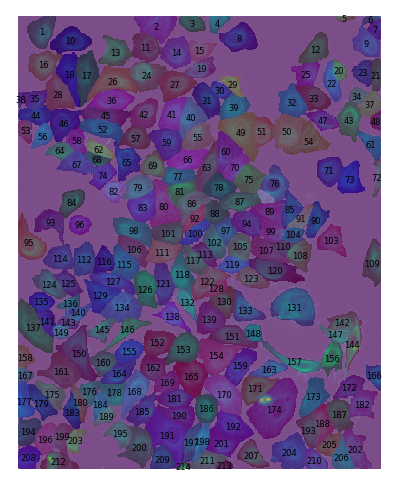

In [19]:
fig, ax = plt.subplots(1, 1, dpi=150)

ax.imshow((pixels / pixels.reshape(1, -1).max(axis=1))[1])
ax.set_axis_off()

ax.imshow(cellpose.plot.mask_rgb(masks2[0]), alpha=0.3)
for prop in regionprops(label_image=masks2[0]):
    ax.text(prop.centroid[1], prop.centroid[0], prop.label, fontsize=4, ha="center", va="center")

In [32]:
masks3, flows3, styles3, diams2 = model.eval([pixels[0]], diameter=None, channels=[0, 0], mask_threshold=0.2)

2022-05-23 13:40:53,640 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-05-23 13:40:55,394 [WARNING] WARNING: not interp
2022-05-23 13:40:57,460 [INFO] estimated cell diameter(s) in 3.82 sec
2022-05-23 13:40:57,461 [INFO] >>> diameter(s) = 
2022-05-23 13:40:57,462 [INFO] [35.07, ]
2022-05-23 13:40:57,462 [INFO] ~~~ FINDING MASKS ~~~
2022-05-23 13:41:00,308 [INFO] >>>> TOTAL TIME 6.67 sec


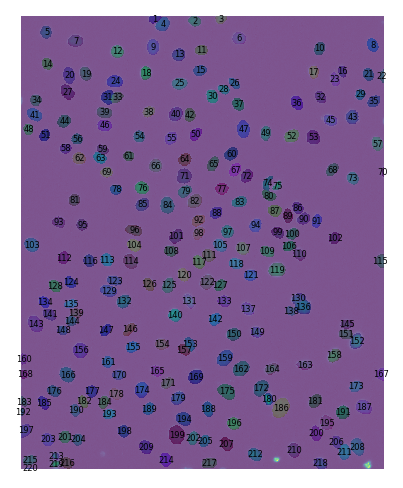

In [33]:
fig, ax = plt.subplots(1, 1, dpi=150)

ax.imshow((pixels / pixels.reshape(1, -1).max(axis=1))[0])
ax.set_axis_off()

ax.imshow(cellpose.plot.mask_rgb(masks3[0]), alpha=0.3)
for prop in regionprops(label_image=masks3[0]):
    ax.text(prop.centroid[1], prop.centroid[0], prop.label, fontsize=4, ha="center", va="center")

In [14]:
pixels = [
    TiffGlobReader(
        glob_in=sorted([str(p) for p in data_dir.glob(f"debug/Week1_150607_B02_s{i}_w*.tif")]),
        indexer=map_to_index,
        channel_names=["DAPI", "Tubulin", "Actin"]
    ).get_image_data("CXY") for i in range (1, 5)
]

In [20]:
%%timeit -r 3 -n 5
masks, flows, styles, diams = model.eval(pixels, diameter=None, channels=[2, 1], mask_threshold=0.2)

2022-05-30 09:21:35,053 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-05-30 09:21:35,060 [INFO] 0%|          | 0/4 [00:00<?, ?it/s]
2022-05-30 09:21:37,315 [WARNING] WARNING: not interp
2022-05-30 09:21:41,658 [INFO] 25%|##5       | 1/4 [00:06<00:19,  6.60s/it]
2022-05-30 09:21:43,594 [WARNING] WARNING: not interp
2022-05-30 09:21:47,330 [INFO] 50%|#####     | 2/4 [00:12<00:12,  6.05s/it]
2022-05-30 09:21:49,188 [WARNING] WARNING: not interp
2022-05-30 09:21:54,105 [INFO] 75%|#######5  | 3/4 [00:19<00:06,  6.38s/it]
2022-05-30 09:21:56,430 [WARNING] WARNING: not interp
2022-05-30 09:22:01,452 [INFO] 100%|##########| 4/4 [00:26<00:00,  6.60s/it]
2022-05-30 09:22:01,454 [INFO] estimated cell diameter(s) in 26.40 sec
2022-05-30 09:22:01,455 [INFO] >>> diameter(s) = 
2022-05-30 09:22:01,456 [INFO] [72.67, 68.50, 69.04, 64.80, ]
2022-05-30 09:22:01,457 [INFO] ~~~ FINDING MASKS ~~~
2022-05-30 09:22:10,698 [INFO] 100%|##########| 4/4 [00:09<00:00,  2.31s/it]
2022-05-30 09:22:10,699 [INFO] >